In [1]:
import numpy as np
import integrators
import matplotlib.pyplot as plt
from tqdm import tqdm

# Social compass model integration

In [2]:
def SC_fully_VODE(t, y, L, phi, conv):
    """ Social compass model equation to be integrated. 
    Input:
    t -- time
    y -- angle, orientation
    L -- lambda, coupling constant representing social influence
    phi -- initial preferred orientation
    conv -- radius, conviction
    Output:
    dy -- final orientation to be integrated
    """

    mean_c = np.cos(y).mean()
    mean_s = np.sin(y).mean()
    
    
    dy = L*(mean_s*np.cos(y) - mean_c*np.sin(y)) + conv*np.sin(phi - y)
    
    return dy

Setting opinion distributions: orientation & conviction.

In [3]:
# System conditions
N = 1000
L = 2.0

# Orientation distribution (bimodal)
phi = np.zeros(N)
phi[0::2] = np.pi/2
phi[1::2] = np.pi/2 - np.pi

# Conviction distribution (alpha = infinity)
conv = np.ones(N)

Integration parameters and initial conditions.

In [4]:
tmax = 10000
np.random.seed(9708)

# Adding a small perturbation to the initial preferred orientation
y0 = phi + 1e-3*np.sign(np.random.uniform(low=-1., high=1., size=N))

Integration using the 'integrators' module.

In [5]:
# Output:
# t -- integration time steps
# theta -- final orientation of the N agents
t, theta = integrators.vode_solver(SC_fully_VODE, y0, tmax, (L, phi, conv))

# Degree of consensus: order parameter

Order parameter as a function of the integration time.

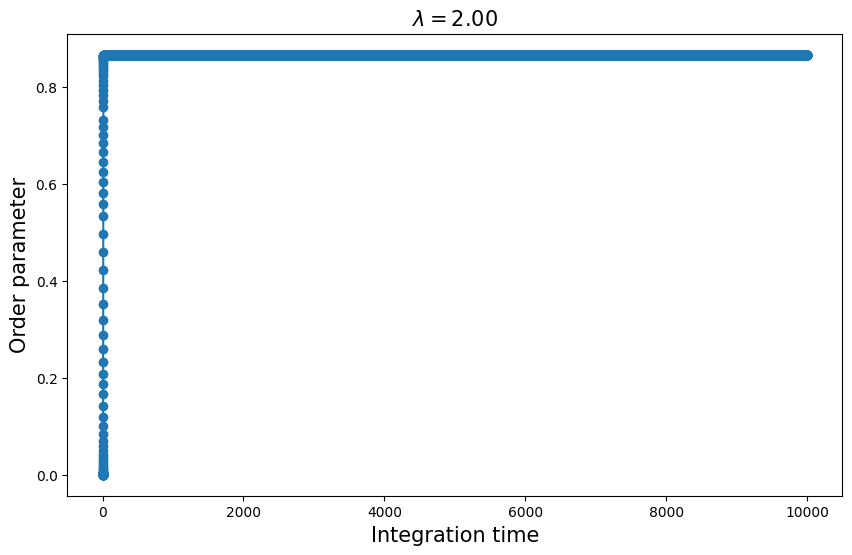

In [9]:
order = np.sqrt(np.power(np.mean(np.sin(theta), axis=0), 2) + np.power(np.mean(np.cos(theta), axis=0), 2))

plt.figure(figsize=(10,6))
plt.xlabel('Integration time', fontsize=15)
plt.ylabel('Order parameter', fontsize=15)
plt.title(r'$\lambda = %1.2f$' %L, fontsize=15)
plt.plot(t, order, "o-")

In [12]:
# Order parameter after integration
print('r(lambda = %1.2f) =' %L, round(order[-1], 3))

r(lambda = 2.00) = 0.866


## Continuation in $\lambda$

In order to save CPU memory, we only save the final value after integration, also by using the 'integrators' module.

In [16]:
# Loop for lambda
coup = np.linspace(0.5, 1.5, 21)
order = np.array([])

for L in tqdm(coup):
    
    # Integration
    t, theta = integrators.vode_solver_final_state(SC_fully_VODE, y0, tmax, (L, phi, conv))
    
    # Order parameter
    RRR = np.sqrt(np.power(np.mean(np.sin(theta), axis=0), 2) + np.power(np.mean(np.cos(theta), axis=0), 2))
    order = np.append(order, RRR)

100%|███████████████████████████████████████████| 21/21 [00:31<00:00,  1.50s/it]


Order parameter as a function of the social influence.

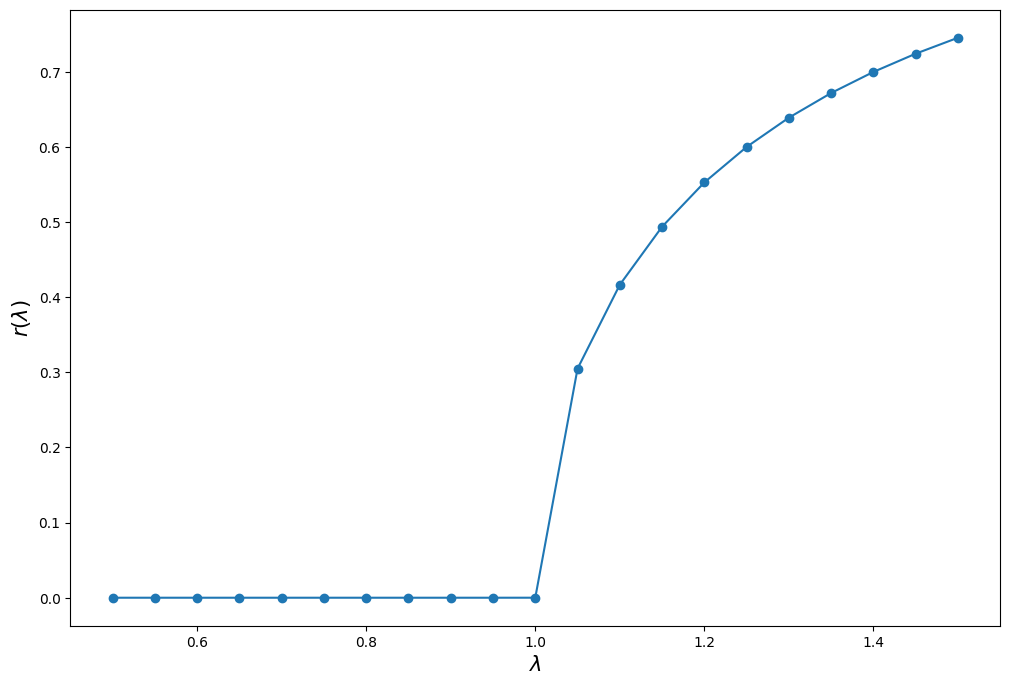

In [18]:
plt.figure(figsize=(12,8))
plt.xlabel(r'$\lambda$', fontsize=15)
plt.ylabel(r'$r(\lambda)$', fontsize=15)
plt.plot(coup, order, "o-")